# What da happen?

Importing Libraries

In [328]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Generating Data

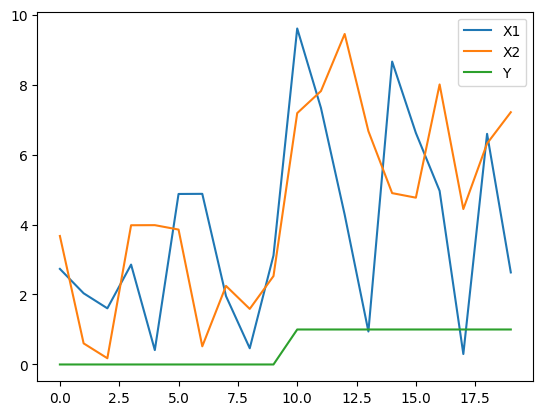

In [329]:
N = 10
X = np.vstack([(np.random.rand(N, 2)*5),(np.random.rand(N, 2)*10)])
Y = np.hstack([[0]*N , [1]*N])

dataset = pd.DataFrame(X,columns=["X1","X2"])
dataset["Y"] = Y

plt.plot(dataset, label='Inline label')
plt.legend(["X1","X2","Y"])
plt.show()

In [330]:
Z = np.zeros((2*N, 2))
for i in range(2*N):
    Z[i, Y[i]] = 1

Z

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

Initialising Weights and Bias Variables

In [331]:
W1 = np.random.randn(3, 2)
B1 = np.random.randn(3)
W2 = np.random.randn(3, 2)
B2 = np.random.randn(2)

W1, B1, W2, B2

(array([[ 1.0422067 ,  0.60797958],
        [-1.02911091,  1.05091303],
        [-1.26107236, -0.3117536 ]]),
 array([-0.91278726, -2.00914944,  0.66342517]),
 array([[ 0.67840286, -0.23124666],
        [-1.73751029,  0.68806082],
        [-2.46212992,  0.90642491]]),
 array([ 1.58075901, -1.60988488]))

Defining Function ( for forward and backward propogation )

In [332]:
def forwardProp(X, w1, b1, w2, b2):
    """
    Forward propagation function for a 2-layer neural network with ReLU activation function
    in the first layer, followed by softmax in the second layer.
    """

    # First layer
    y1 =  X.dot(w1.T) + b1
    M = 1 / (1 + np.exp(-y1))
    
    # Second layer
    y2 = M.dot(w2) + b2
    e = np.exp(y2)
    Y = e / e.sum(axis=1, keepdims=True)

    return Y, M

forwardProp(X, W1, B1, W2, B2)

(array([[0.96611127, 0.03388873],
        [0.97069891, 0.02930109],
        [0.95691111, 0.04308889],
        [0.96334824, 0.03665176],
        [0.74556335, 0.25443665],
        [0.98159601, 0.01840399],
        [0.98328546, 0.01671454],
        [0.96730656, 0.03269344],
        [0.84319888, 0.15680112],
        [0.97916207, 0.02083793],
        [0.98319514, 0.01680486],
        [0.97336549, 0.02663451],
        [0.85112101, 0.14887899],
        [0.81315906, 0.18684094],
        [0.98358032, 0.01641968],
        [0.98282877, 0.01717123],
        [0.89984707, 0.10015293],
        [0.71987512, 0.28012488],
        [0.97912502, 0.02087498],
        [0.85562176, 0.14437824]]),
 array([[9.84738871e-01, 2.76673769e-01, 1.93325077e-02],
        [8.28429849e-01, 3.01964920e-02, 1.10014367e-01],
        [7.04318117e-01, 3.00723068e-02, 1.95317777e-01],
        [9.88810672e-01, 3.17554331e-01, 1.51135992e-02],
        [8.73989334e-01, 8.52227634e-01, 2.50386579e-01],
        [9.98513999e-01, 4.8

In [333]:
def diffW1(X, H, Z, output, Wi_2):
    """ Gradient for the first layer weights """
    dZ = (Z - output).dot(Wi_2.T) * H * (1 - H)
    return X.T.dot(dZ)

def diffB1(Z, Y, W2, H):
    """ Gradient for the first layer bias """
    return ((Z - Y).dot(W2.T) * H * (1 - H)).sum(axis=0)

def diffW2(H, Z, Y):
    """ Gradient for the second layer weights """
    return H.T.dot(Z - Y)

def diffB2(Z, Y):
    """ Gradient for the second layer bias """
    return (Z - Y).sum(axis=0)

Training Model

In [334]:
learningRate = 0.001

for epoch in range(5000):
    output, hidden = forwardProp(X, W1, B1, W2, B2)
    
    W1 += learningRate * diffW1(X, hidden, Z, output, W2).T
    B1 += learningRate * diffB1(Z, output, W2, hidden)
    
    W2 += learningRate * diffW2(hidden, Z, output)
    B2 += learningRate * diffB2(Z, output)

Testing

In [335]:
def calculate(Xtest, W1, B1, W2, B2):
    Z = Xtest.dot(W1.T) + B1
    firstLayer = 1 / (1 + np.exp(-Z))

    secondLayer = firstLayer.dot(W2) + B2
    expA = np.exp(secondLayer)

    return expA / expA.sum()

In [336]:
test1 = np.array([1, 3])
ans1 = calculate(test1, W1, B1, W2, B2)
print("For X1 = 1, X2 = 3 :")
print("--> Prob of class 0 :", ans1[0])
print("--> Prob of class 1 :", ans1[1])

test2 = np.array([6, 9])
ans2 = calculate(test2, W1, B1, W2, B2)
print("\nFor X1 = 6, X2 = 9 :")
print("--> Prob of class 0 :", ans2[0])
print("--> Prob of class 1 :", ans2[1])

test3 = np.array([3, 7])
ans3 = calculate(test3, W1, B1, W2, B2)
print("\nFor X1 = 3, X2 = 7 :")
print("--> Prob of class 0 :", ans3[0])
print("--> Prob of class 1 :", ans3[1])

test4 = np.array([5, 5])
ans4 = calculate(test4, W1, B1, W2, B2)
print("\nFor X1 = 3, X2 = 7 :")
print("--> Prob of class 0 :", ans4[0])
print("--> Prob of class 1 :", ans4[1])

For X1 = 1, X2 = 3 :
--> Prob of class 0 : 0.9431230508102718
--> Prob of class 1 : 0.05687694918972823

For X1 = 6, X2 = 9 :
--> Prob of class 0 : 0.02034412150338996
--> Prob of class 1 : 0.97965587849661

For X1 = 3, X2 = 7 :
--> Prob of class 0 : 0.0276817465935602
--> Prob of class 1 : 0.9723182534064398

For X1 = 3, X2 = 7 :
--> Prob of class 0 : 0.1714881732448843
--> Prob of class 1 : 0.8285118267551157
